## 1. 读取数据

In [54]:
import csv

passengers = []
with open("./titanic.csv", encoding="utf-8") as file:
    for line in csv.DictReader(file, skipinitialspace=True):
        passengers.append(line)
for passenger in passengers:
    print(passenger)

{'PassengerId': '1', 'Survived': '0', 'Pclass': '3', 'Name': 'Braund, Mr. Owen Harris', 'Sex': 'male', 'Age': '22', 'SibSp': '1', 'Parch': '0', 'Ticket': 'A/5 21171', 'Fare': '7.25', 'Cabin': '', 'Embarked': 'S'}
{'PassengerId': '2', 'Survived': '1', 'Pclass': '1', 'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Sex': 'female', 'Age': '38', 'SibSp': '1', 'Parch': '0', 'Ticket': 'PC 17599', 'Fare': '71.2833', 'Cabin': 'C85', 'Embarked': 'C'}
{'PassengerId': '3', 'Survived': '1', 'Pclass': '3', 'Name': 'Heikkinen, Miss. Laina', 'Sex': 'female', 'Age': '26', 'SibSp': '0', 'Parch': '0', 'Ticket': 'STON/O2. 3101282', 'Fare': '7.925', 'Cabin': '', 'Embarked': 'S'}
{'PassengerId': '4', 'Survived': '1', 'Pclass': '1', 'Name': 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Sex': 'female', 'Age': '35', 'SibSp': '1', 'Parch': '0', 'Ticket': '113803', 'Fare': '53.1', 'Cabin': 'C123', 'Embarked': 'S'}
{'PassengerId': '5', 'Survived': '0', 'Pclass': '3', 'Name': 'Allen, Mr. William

## 2. 计算年龄和性别的分布

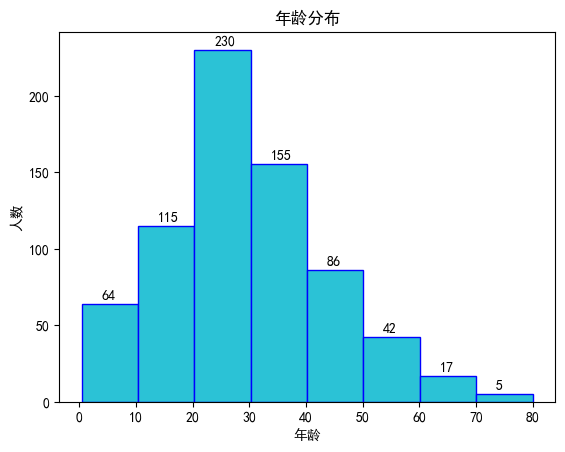

In [55]:
# 年龄分布
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams["font.sans-serif"] = ["SimHei"]

ages = []
for passenger in passengers:
    age = passenger["Age"]
    if age:
        ages.append(float(age))
hist = plt.hist(ages, bins=8, color="#2bc2d6", edgecolor="blue")
plt.xlabel("年龄")
plt.ylabel("人数")
plt.title("年龄分布")

for i in range(len(hist[0])):
    plt.annotate(text=str(int(hist[0][i])), xy=(hist[1][i] + 3.5, hist[0][i] + 3))

plt.show()

In [56]:
print(f'平均年龄: {sum(ages)/len(ages):.2f}')

平均年龄: 29.70


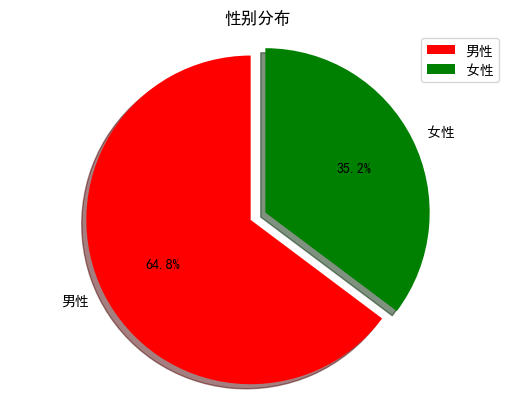

In [57]:
# 性别分布
genders = []
for passenger in passengers:
    gender = passenger["Sex"]
    if gender:
        genders.append(gender)

num_of_male = genders.count("male")
num_of_female = genders.count("female")
labels = ["男性", "女性"]
size = [num_of_male, num_of_female]
colors = ["red", "green"]
explode = [0.1, 0]
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title("性别分布")
plt.legend()
plt.show()

In [58]:
print(f'男性人数: {num_of_male}')
print(f'女性人数: {num_of_female}')
print(f'总人数: {len(genders)}')

男性人数: 577
女性人数: 314
总人数: 891


## 3. 性别对生还概率的影响

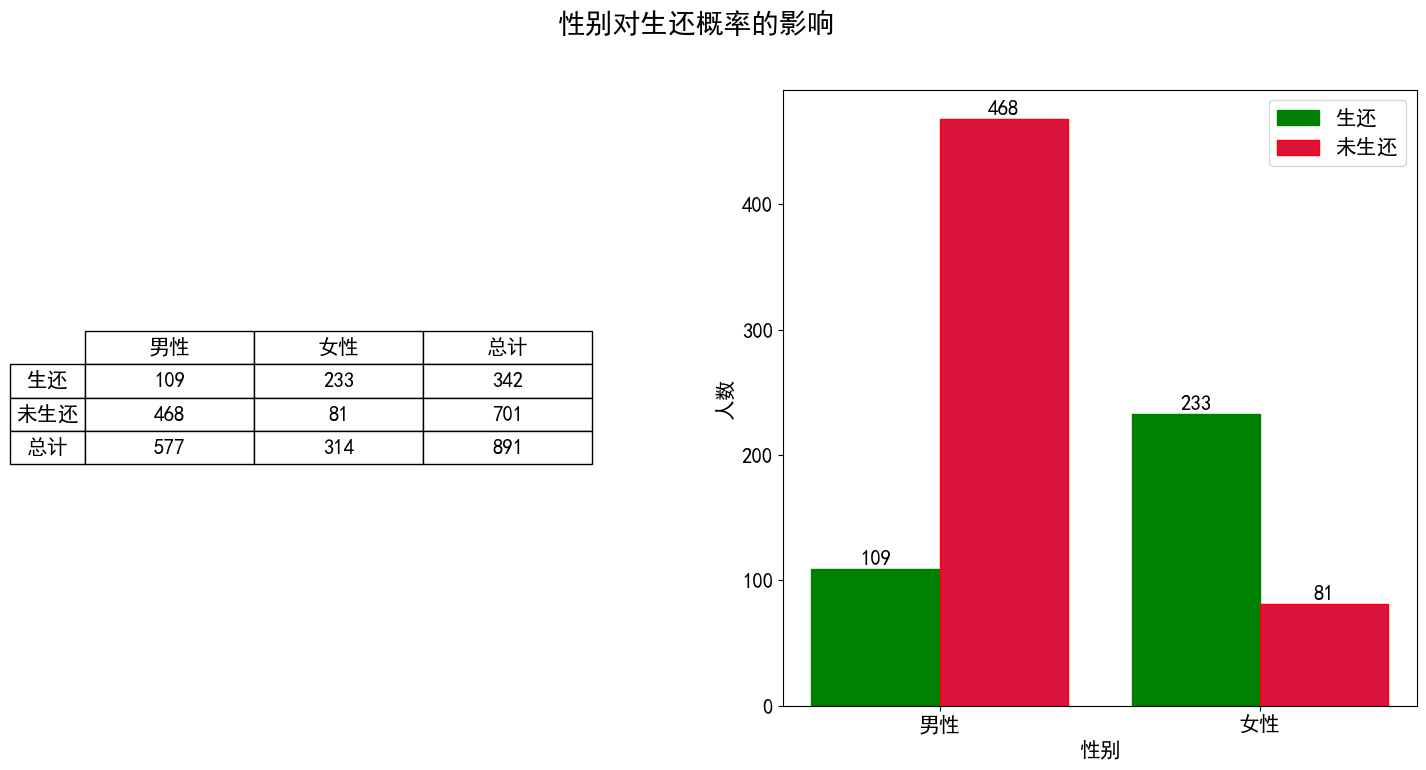

In [59]:
from matplotlib import pyplot as plt

is_survived = []
num_of_survived_male = 0
num_of_survived_female = 0

for i, passenger in enumerate(passengers):
    if passenger["Survived"] == "1":
        is_survived.append(True)
        if genders[i] == "male":
            num_of_survived_male += 1
        else:
            num_of_survived_female += 1
    else:
        is_survived.append(False)

num_of_not_survived_male = num_of_male - num_of_survived_male
num_of_not_survived_female = num_of_female - num_of_survived_female
col = ["男性", "女性", "总计"]
row = ["生还", "未生还", "总计"]
values = [
    [num_of_survived_male, num_of_survived_female, num_of_survived_male + num_of_survived_female],
    [num_of_not_survived_male, num_of_not_survived_female, num_of_not_survived_male + num_of_survived_female],
    [num_of_male, num_of_female, num_of_male + num_of_female]
]
plt.figure(figsize=(18, 8))
plt.suptitle("性别对生还概率的影响", size=20)
plt.subplot(1, 2, 1)
table = plt.table(cellText=values, rowLabels=row, colLabels=col, loc='center', cellLoc='center', rowLoc='center', colLoc='center')
table.set_fontsize(15)
table.scale(0.8, 2)
plt.axis('off')
plt.subplot(1, 2, 2)
left = range(len(labels))
rect1 = plt.bar(left, height=values[0][:2], width=0.4, color='#008000', edgecolor='g', label='生还')
rect2 = plt.bar([i + 0.4 for i in left], height=values[1][:2], width=0.4, color='#dc143c', edgecolor='r', label='未生还')
plt.xlabel("性别", size=15)
plt.ylabel("人数", size=15)
plt.xticks([i + 0.2 for i in left], labels, size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)

for rect in rect1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 1, str(height), ha='center', va='bottom', fontsize=15)
for rect in rect2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 1, str(height), ha='center', va='bottom', fontsize=15)

plt.show()

In [60]:
k = (len(is_survived) * ((values[0][0] * values[1][1] - values[0][1] * values[1][0]) ** 2)) / (values[0][2] * values[1][2] * values[2][0] * values[2][1])
print(f'卡方值: {k}')

卡方值: 206.0125038014122


### 上面计算出来的卡方值说明，性别与生还概率具有极强的相关性。

## 4. 船舱对生还概率的影响

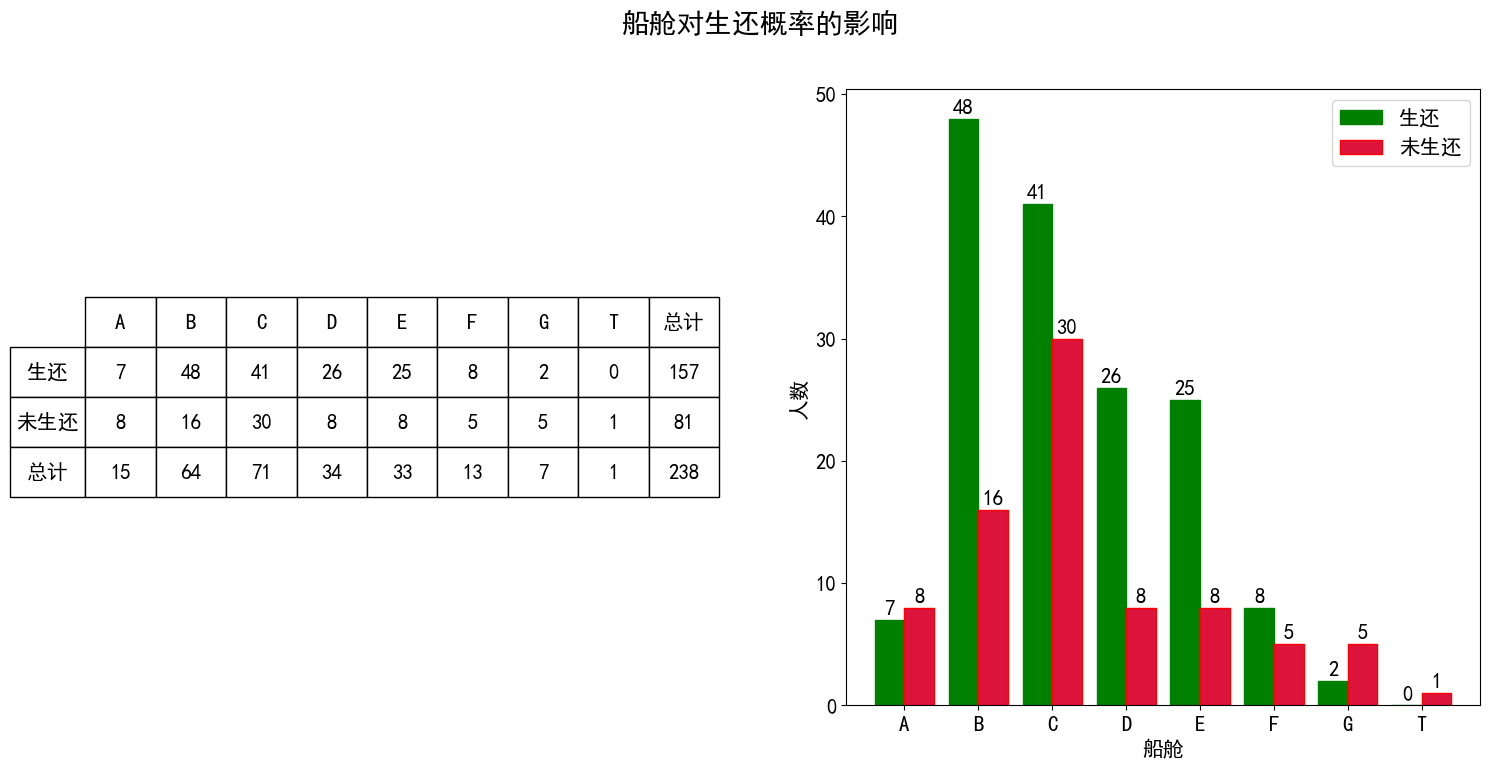

In [61]:
cabins = {
    'A': [0, 0],
    'B': [0, 0],
    'C': [0, 0],
    'D': [0, 0],
    'E': [0, 0],
    'F': [0, 0],
    'G': [0, 0],
    'T': [0, 0]
}
num_of_survived = 0
num_of_not_survived = 0
for i, passenger in enumerate(passengers):
    cabin = passenger["Cabin"]
    if cabin:
        temp = cabin.split(" ")
        for j in temp:
            if j[0] in cabins:
                if passengers[i]["Survived"] == "1":
                    cabins[j[0]][0] += 1
                    num_of_survived += 1
                else:
                    cabins[j[0]][1] += 1
                    num_of_not_survived += 1

col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', '总计']
values = [
    [cabins['A'][0], cabins['B'][0], cabins['C'][0], cabins['D'][0], cabins['E'][0], cabins['F'][0], cabins['G'][0], cabins['T'][0], num_of_survived],
    [cabins['A'][1], cabins['B'][1], cabins['C'][1], cabins['D'][1], cabins['E'][1], cabins['F'][1], cabins['G'][1], cabins['T'][1], num_of_not_survived],
    [sum(cabins['A']), sum(cabins['B']), sum(cabins['C']), sum(cabins['D']), sum(cabins['E']), sum(cabins['F']), sum(cabins['G']), sum(cabins['T']), num_of_survived + num_of_not_survived]
]
plt.figure(figsize=(18, 8))
plt.suptitle("船舱对生还概率的影响", size=20)
plt.subplot(1, 2, 1)
table = plt.table(cellText=values, rowLabels=row, colLabels=col, loc='center', cellLoc='center', rowLoc='center', colLoc='center')
table.set_fontsize(15)
table.scale(1, 3)
plt.axis('off')
plt.subplot(1, 2, 2)
left = range(len(col) - 1)
rect1 = plt.bar(left, height=values[0][:8], width=0.4, color='#008000', edgecolor='g', label='生还')
rect2 = plt.bar([i + 0.4 for i in left], height=values[1][:8], width=0.4, color='#dc143c', edgecolor='r', label='未生还')
plt.xlabel("船舱", size=15)
plt.ylabel("人数", size=15)
plt.xticks([i + 0.2 for i in left], col[:8], size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)

for rect in rect1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.2, str(height), ha='center', va='bottom', size=15)
for rect in rect2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.2, str(height), ha='center', va='bottom', size=15)

plt.show()

### 部分船舱样本量不足，导致计算出的生还概率不准确。
### 大体而言，船舱 B、D、E的生还概率较高

## 5. 年龄对生还概率的影响

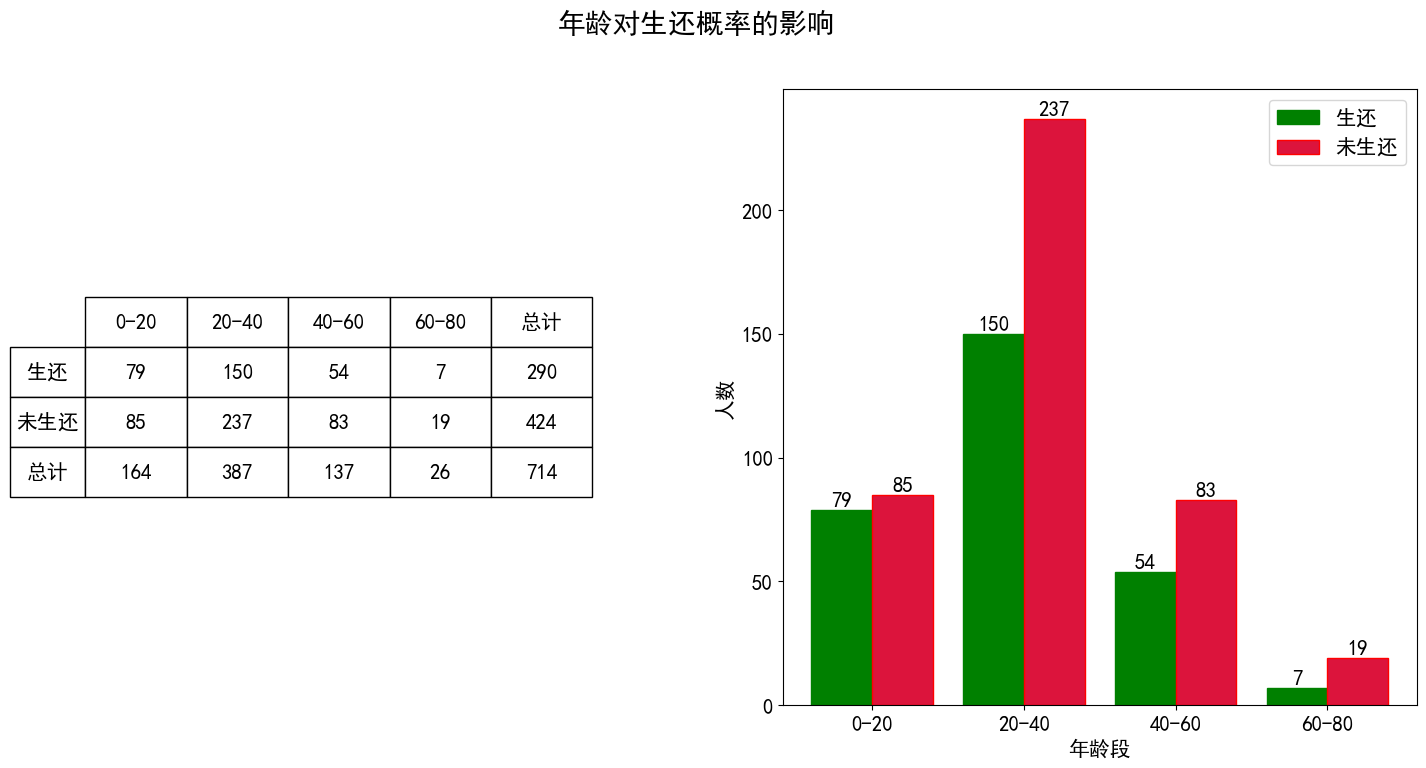

In [62]:
ages = {
    '0-20': [0, 0],
    '20-40': [0, 0],
    '40-60': [0, 0],
    '60-80': [0, 0],
}
num_of_survived = 0
num_of_not_survived = 0
for i, passenger in enumerate(passengers):
    age = passenger["Age"]
    if age:
        age = float(age)
        if age < 20:
            if passengers[i]["Survived"] == "1":
                ages['0-20'][0] += 1
                num_of_survived += 1
            else:
                ages['0-20'][1] += 1
                num_of_not_survived += 1
        elif age < 40:
            if passengers[i]["Survived"] == "1":
                ages['20-40'][0] += 1
                num_of_survived += 1
            else:
                ages['20-40'][1] += 1
                num_of_not_survived += 1
        elif age < 60:
            if passengers[i]["Survived"] == "1":
                ages['40-60'][0] += 1
                num_of_survived += 1
            else:
                ages['40-60'][1] += 1
                num_of_not_survived += 1
        else:
            if passengers[i]["Survived"] == "1":
                ages['60-80'][0] += 1
                num_of_survived += 1
            else:
                ages['60-80'][1] += 1
                num_of_not_survived += 1

col = ['0-20', '20-40', '40-60', '60-80', '总计']
values = [
    [ages['0-20'][0], ages['20-40'][0], ages['40-60'][0], ages['60-80'][0], num_of_survived],
    [ages['0-20'][1], ages['20-40'][1], ages['40-60'][1], ages['60-80'][1], num_of_not_survived],
    [sum(ages['0-20']), sum(ages['20-40']), sum(ages['40-60']), sum(ages['60-80']), num_of_survived + num_of_not_survived]
]
plt.figure(figsize=(18, 8))
plt.suptitle("年龄对生还概率的影响", size=20)
plt.subplot(1, 2, 1)
table = plt.table(cellText=values, rowLabels=row, colLabels=col, loc='center', cellLoc='center', rowLoc='center', colLoc='center')
table.set_fontsize(15)
table.scale(0.8, 3)
plt.axis('off')
plt.subplot(1, 2, 2)
left = range(len(col) - 1)
rect1 = plt.bar(left, height=values[0][:4], width=0.4, color='#008000', edgecolor='g', label='生还')
rect2 = plt.bar([i + 0.4 for i in left], height=values[1][:4], width=0.4, color='#dc143c', edgecolor='r', label='未生还')
plt.xlabel("年龄段", size=15)
plt.ylabel("人数", size=15)
plt.xticks([i + 0.2 for i in left], col[:4], size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)


for rect in rect1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.2, str(height), ha='center', va='bottom', size=15)
for rect in rect2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.2, str(height), ha='center', va='bottom', size=15)

plt.show()

In [63]:
k = 0
for i, j in enumerate(col[:-1]):
    k += ages[j][0] ** 2 / (values[0][-1] * values[2][i])
    k += ages[j][1] ** 2 / (values[1][-1] * values[2][i])
k = (k - 1) * values[2][-1]
k *= 3
print(f'卡方值: {k}')

卡方值: 19.60971198874436


### 上面计算出来的卡方值说明，年龄与生还概率具有强相关性。

## 6. 社会经济等级对生还概率的影响

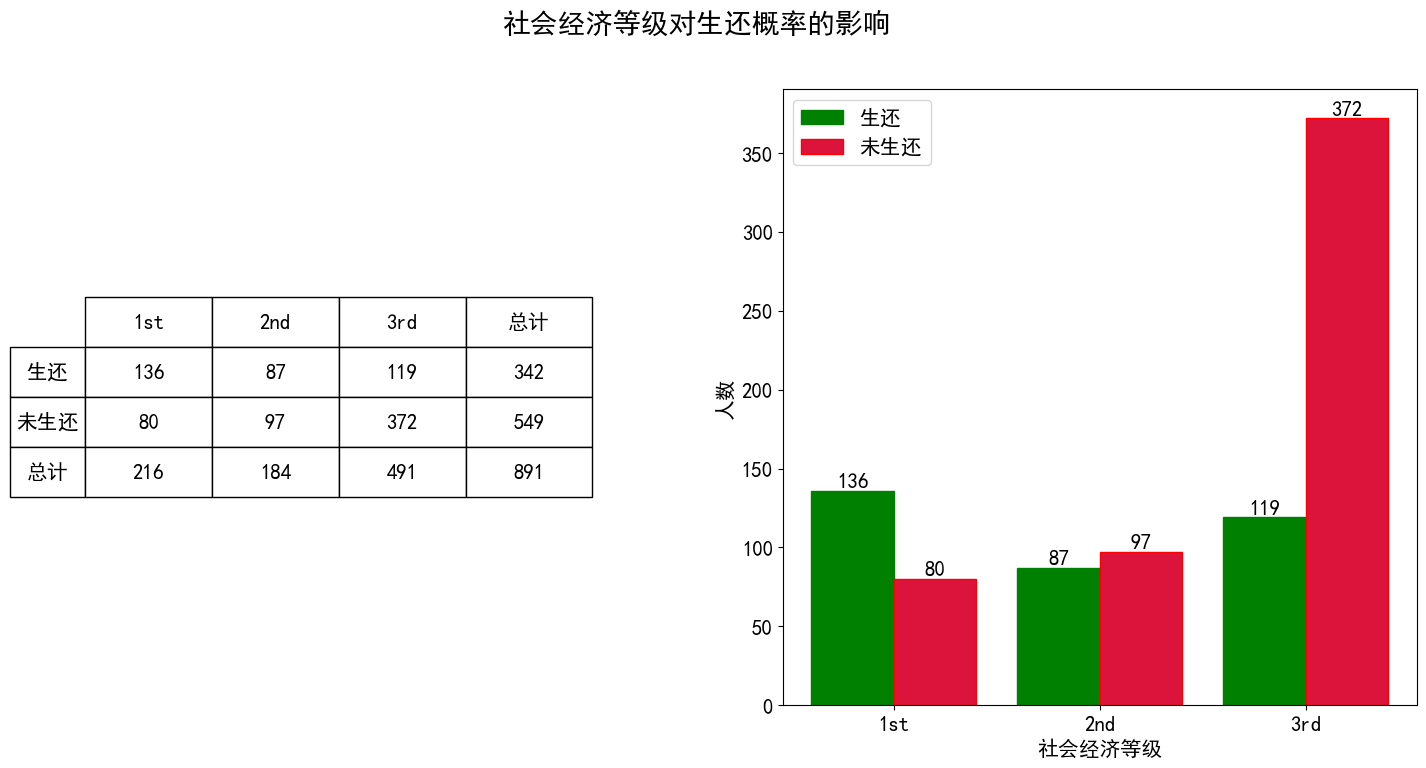

In [64]:
classes = {
    '1st': [0, 0],
    '2nd': [0, 0],
    '3rd': [0, 0],
}
num_of_survived = 0
num_of_not_survived = 0
for i, passenger in enumerate(passengers):
    pclass = passenger["Pclass"]
    if pclass == "1":
        if passengers[i]["Survived"] == "1":
            classes['1st'][0] += 1
            num_of_survived += 1
        else:
            classes['1st'][1] += 1
            num_of_not_survived += 1
    elif pclass == "2":
        if passengers[i]["Survived"] == "1":
            classes['2nd'][0] += 1
            num_of_survived += 1
        else:
            classes['2nd'][1] += 1
            num_of_not_survived += 1
    else:
        if passengers[i]["Survived"] == "1":
            classes['3rd'][0] += 1
            num_of_survived += 1
        else:
            classes['3rd'][1] += 1
            num_of_not_survived += 1

col = ['1st', '2nd', '3rd', '总计']
values = [
    [classes['1st'][0], classes['2nd'][0], classes['3rd'][0], num_of_survived],
    [classes['1st'][1], classes['2nd'][1], classes['3rd'][1], num_of_not_survived],
    [sum(classes['1st']), sum(classes['2nd']), sum(classes['3rd']), num_of_survived + num_of_not_survived]
]
plt.figure(figsize=(18, 8))
plt.suptitle("社会经济等级对生还概率的影响", size=20)
plt.subplot(1, 2, 1)
table = plt.table(cellText=values, rowLabels=row, colLabels=col, loc='center', cellLoc='center', rowLoc='center', colLoc='center')
table.set_fontsize(15)
table.scale(0.8, 3)
plt.axis('off')
plt.subplot(1, 2, 2)
left = range(len(col) - 1)
rect1 = plt.bar(left, height=values[0][:3], width=0.4, color='#008000', edgecolor='g', label='生还')
rect2 = plt.bar([i + 0.4 for i in left], height=values[1][:3], width=0.4, color='#dc143c', edgecolor='r', label='未生还')
plt.xlabel("社会经济等级", size=15)
plt.ylabel("人数", size=15)
plt.xticks([i + 0.2 for i in left], col[:3], size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)


for rect in rect1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', size=15)
for rect in rect2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', size=15)

plt.show()

In [65]:
k = 0
for i, j in enumerate(col[:-1]):
    k += classes[j][0] ** 2 / (values[0][-1] * values[2][i])
    k += classes[j][1] ** 2 / (values[1][-1] * values[2][i])
k = (k - 1) * values[2][-1]
k *= 2
print(f'卡方值: {k}')

卡方值: 205.77797751392112


### 上面计算出来的卡方值说明，社会经济等级与生还概率具有极强的相关性。

## 7.参考文献
* 行列资料表的卡方检验 https://bookdown.org/wxhyihuan/Notebook-of-medical-statistics-1605856202966/%E7%AC%AC%E4%B8%83%E7%AB%A0-chi2%E6%A3%80%E9%AA%8C.html
* 数据集中各列含义 [pdf]TitanicMETA.pdf